In [1]:
import pandas as pd

import requests

In [2]:
json_URL = 'https://kosis.kr/openapi/statisticsData.do?method=getList&apiKey=NzE3NTVkNWM5OTU4NjM4NjcwNDBiYTM0MzQwOTFlZjQ=&format=json&jsonVD=Y&userStatsId=ysahn34/101/DT_1J20112/2/1/20231203004217&prdSe=Q&startPrdDe=201701&endPrdDe=202303'
a = 'C:/Users/안윤성/Desktop/ysahn/statstat/a.csv'

response = requests.get(json_URL)


In [3]:
response

<Response [200]>

In [4]:
test_data = response.json()

In [5]:
df = pd.json_normalize(test_data)

In [6]:
df.head()

,TBL_NM,PRD_DE,TBL_ID,ITM_NM,ITM_NM_ENG,ITM_ID,UNIT_NM,ORG_ID,UNIT_NM_ENG,C1_OBJ_NM,...,C2_OBJ_NM,C2_OBJ_NM_ENG,DT,PRD_SE,C2,C1,C1_NM,C2_NM,C1_NM_ENG,C2_NM_ENG
0,품목별 소비자물가지수(품목성질별: 2020＝100),201701,DT_1J20112,소비자물가지수,CPI,T,2020＝100,101,2020＝100,시도별,...,품목별,by Item,93.556,Q,A,T10,전국,농축수산물,whole country,Agricultural ＆ marine products
1,품목별 소비자물가지수(품목성질별: 2020＝100),201702,DT_1J20112,소비자물가지수,CPI,T,2020＝100,101,2020＝100,시도별,...,품목별,by Item,90.453,Q,A,T10,전국,농축수산물,whole country,Agricultural ＆ marine products
2,품목별 소비자물가지수(품목성질별: 2020＝100),201703,DT_1J20112,소비자물가지수,CPI,T,2020＝100,101,2020＝100,시도별,...,품목별,by Item,93.699,Q,A,T10,전국,농축수산물,whole country,Agricultural ＆ marine products
3,품목별 소비자물가지수(품목성질별: 2020＝100),201704,DT_1J20112,소비자물가지수,CPI,T,2020＝100,101,2020＝100,시도별,...,품목별,by Item,90.122,Q,A,T10,전국,농축수산물,whole country,Agricultural ＆ marine products
4,품목별 소비자물가지수(품목성질별: 2020＝100),201801,DT_1J20112,소비자물가지수,CPI,T,2020＝100,101,2020＝100,시도별,...,품목별,by Item,94.222,Q,A,T10,전국,농축수산물,whole country,Agricultural ＆ marine products


In [7]:
df.to_csv('test1.csv', encoding = 'cp949')

In [8]:
df=df[['PRD_DE','DT','C2_NM_ENG']]

In [9]:
df.head()

,PRD_DE,DT,C2_NM_ENG
0,201701,93.556,Agricultural ＆ marine products
1,201702,90.453,Agricultural ＆ marine products
2,201703,93.699,Agricultural ＆ marine products
3,201704,90.122,Agricultural ＆ marine products
4,201801,94.222,Agricultural ＆ marine products


In [10]:
df=df.rename(columns={'PRD_DE':'기간(분기)','DT':'물가지수','C2_NM_ENG':'분야'})

In [11]:
df.to_csv('test1.csv', encoding = 'cp949') # csv파일 다시 저장

In [12]:
df.set_index('기간(분기)',inplace=True)

In [13]:
df.head()

,물가지수,분야
기간(분기),,
201701,93.556,Agricultural ＆ marine products
201702,90.453,Agricultural ＆ marine products
201703,93.699,Agricultural ＆ marine products
201704,90.122,Agricultural ＆ marine products
201801,94.222,Agricultural ＆ marine products


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 201701 to 202303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   물가지수    108 non-null    object
 1   분야      108 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB
None


In [15]:
# '분야(영어)' 열의 고유한 값 찾기
a = df['분야'].unique()

print(a)

['Agricultural ＆ marine products' 'Industrial products'
 'Electricity and Gas and Water' 'Personal services']


In [16]:
# '물가지수' 열을 숫자로 변환
df['물가지수'] = pd.to_numeric(df['물가지수'], errors='coerce')

# 변환 후 데이터프레임 정보 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 201701 to 202303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   물가지수    108 non-null    float64
 1   분야      108 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.5+ KB
None


In [17]:
df.groupby('분야').mean()

,물가지수
분야,
Agricultural ＆ marine products,102.015222
Electricity and Gas and Water,105.283000
Industrial products,102.986519
Personal services,101.623481


In [18]:
df.groupby('분야').count()

,물가지수
분야,
Agricultural ＆ marine products,27
Electricity and Gas and Water,27
Industrial products,27
Personal services,27


In [19]:
df.groupby('분야').max()

,물가지수
분야,
Agricultural ＆ marine products,119.06
Electricity and Gas and Water,132.65
Industrial products,112.53
Personal services,114.12


In [20]:
df.groupby('분야').describe()

물가지수                                          \
                               count        mean        std     min      25%   
분야                                                                             
Agricultural ＆ marine products  27.0  102.015222   9.092551  90.122  93.9225   
Electricity and Gas and Water   27.0  105.283000  10.813171  94.250  99.9200   
Industrial products             27.0  102.986519   4.687489  98.859  99.8100   
Personal services               27.0  101.623481   5.919660  94.001  97.4835   

                                                          
                                    50%      75%     max  
분야                                                        
Agricultural ＆ marine products   98.270  110.450  119.06  
Electricity and Gas and Water   101.855  103.767  132.65  
Industrial products             100.617  105.225  112.53  
Personal services                99.720  104.605  114.12

In [21]:
piv_table_dict = {}

In [22]:
a=df[['물가지수']]

In [23]:
print(a)

           물가지수
기간(분기)         
201701   93.556
201702   90.453
201703   93.699
201704   90.122
201801   94.222
...         ...
202203  109.340
202204  109.990
202301  111.780
202302  113.460
202303  114.120

[108 rows x 1 columns]


In [24]:
b=a[['물가지수']]

In [25]:
print(b)

           물가지수
기간(분기)         
201701   93.556
201702   90.453
201703   93.699
201704   90.122
201801   94.222
...         ...
202203  109.340
202204  109.990
202301  111.780
202302  113.460
202303  114.120

[108 rows x 1 columns]


In [26]:
ndf=df.pivot(columns='분야', values='물가지수')

In [27]:
ndf

분야,Agricultural ＆ marine products,Electricity and Gas and Water,Industrial products,Personal services
기간(분기),,,,
201701,93.556,102.430,99.160,94.001
201702,90.453,103.725,98.977,94.445
201703,93.699,103.809,98.859,95.056
201704,90.122,101.557,99.514,95.020
201801,94.222,100.530,99.877,96.068
201802,92.302,100.576,100.431,97.042
201803,98.270,96.572,100.614,97.479
201804,96.516,101.886,100.617,97.488
201901,94.443,101.855,99.177,98.308


In [28]:
print(ndf.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 201701 to 202303
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Agricultural ＆ marine products  27 non-null     float64
 1   Electricity and Gas and Water   27 non-null     float64
 2   Industrial products             27 non-null     float64
 3   Personal services               27 non-null     float64
dtypes: float64(4)
memory usage: 1.1+ KB
None


In [29]:
print(ndf.describe())

분야     Agricultural ＆ marine products  Electricity and Gas and Water  \
count                       27.000000                      27.000000   
mean                       102.015222                     105.283000   
std                          9.092551                      10.813171   
min                         90.122000                      94.250000   
25%                         93.922500                      99.920000   
50%                         98.270000                     101.855000   
75%                        110.450000                     103.767000   
max                        119.060000                     132.650000   

분야     Industrial products  Personal services  
count            27.000000          27.000000  
mean            102.986519         101.623481  
std               4.687489           5.919660  
min              98.859000          94.001000  
25%              99.810000          97.483500  
50%             100.617000          99.720000  
75%            

In [30]:
columns_to_convert = ['Agricultural ＆ marine products', 'Electricity and Gas and Water', 'Industrial products', 'Personal services']


In [31]:
ndf[columns_to_convert] = ndf[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [32]:
print(ndf.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 201701 to 202303
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Agricultural ＆ marine products  27 non-null     float64
 1   Electricity and Gas and Water   27 non-null     float64
 2   Industrial products             27 non-null     float64
 3   Personal services               27 non-null     float64
dtypes: float64(4)
memory usage: 1.1+ KB
None


In [33]:
print(ndf.describe())

분야     Agricultural ＆ marine products  Electricity and Gas and Water  \
count                       27.000000                      27.000000   
mean                       102.015222                     105.283000   
std                          9.092551                      10.813171   
min                         90.122000                      94.250000   
25%                         93.922500                      99.920000   
50%                         98.270000                     101.855000   
75%                        110.450000                     103.767000   
max                        119.060000                     132.650000   

분야     Industrial products  Personal services  
count            27.000000          27.000000  
mean            102.986519         101.623481  
std               4.687489           5.919660  
min              98.859000          94.001000  
25%              99.810000          97.483500  
50%             100.617000          99.720000  
75%            

<Axes: xlabel='기간(분기)'>

C:\Users\CBNU\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
C:\Users\CBNU\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\CBNU\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\CBNU\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50556 (\N{HANGUL SYLLABLE YA}) missing from current font.
  func(*args, **kwargs)
C:\Users\CBNU\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 65286 (\N{FULLWIDTH AMPERSAND}) missing from current font.
  func(*args, **kwargs)
C:\Users\CBNU\AppData\Roaming\Python\Python312\site-

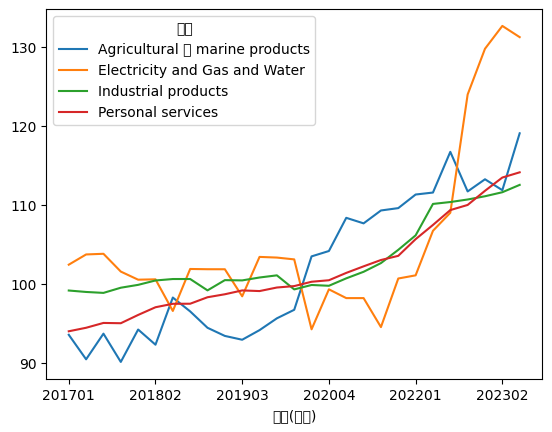

In [34]:
ndf.plot()

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
x = ndf[['Agricultural ＆ marine products','Electricity and Gas and Water','Industrial products']] #독립변수
y=ndf['Personal services'] #종속변수

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [38]:
print('traindata: ',x_train.shape)
print('testdata : ',x_test.shape)

traindata:  (18, 3)
testdata :  (9, 3)


In [39]:
from sklearn.linear_model import LinearRegression


In [40]:
lr = LinearRegression()

In [41]:
lr.fit(x_train, y_train)

LinearRegression()

In [42]:
r_square = lr.score(x_test,y_test)
print(r_square)


0.9566727500121981


In [44]:
print('상수항 b', lr.intercept_)

상수항 b 13.296203302872826


In [45]:
y_hat = lr.predict(x_test)

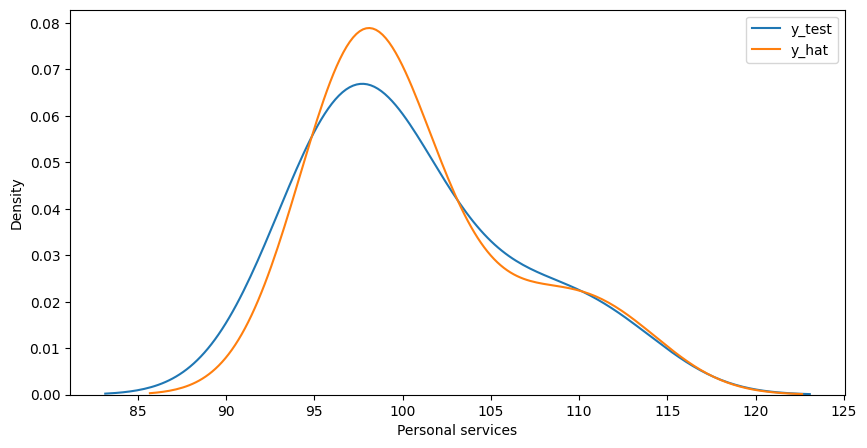

In [46]:
plt.figure(figsize=(10,5))
ax1=sns.kdeplot(y_test,label="y_test")
ax2= sns.kdeplot(y_hat, label="y_hat",ax=ax1)
plt.legend()
plt.show() #전체적인 회귀

c:\Users\CBNU\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 65286 (\N{FULLWIDTH AMPERSAND}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\CBNU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65286 (\N{FULLWIDTH AMPERSAND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


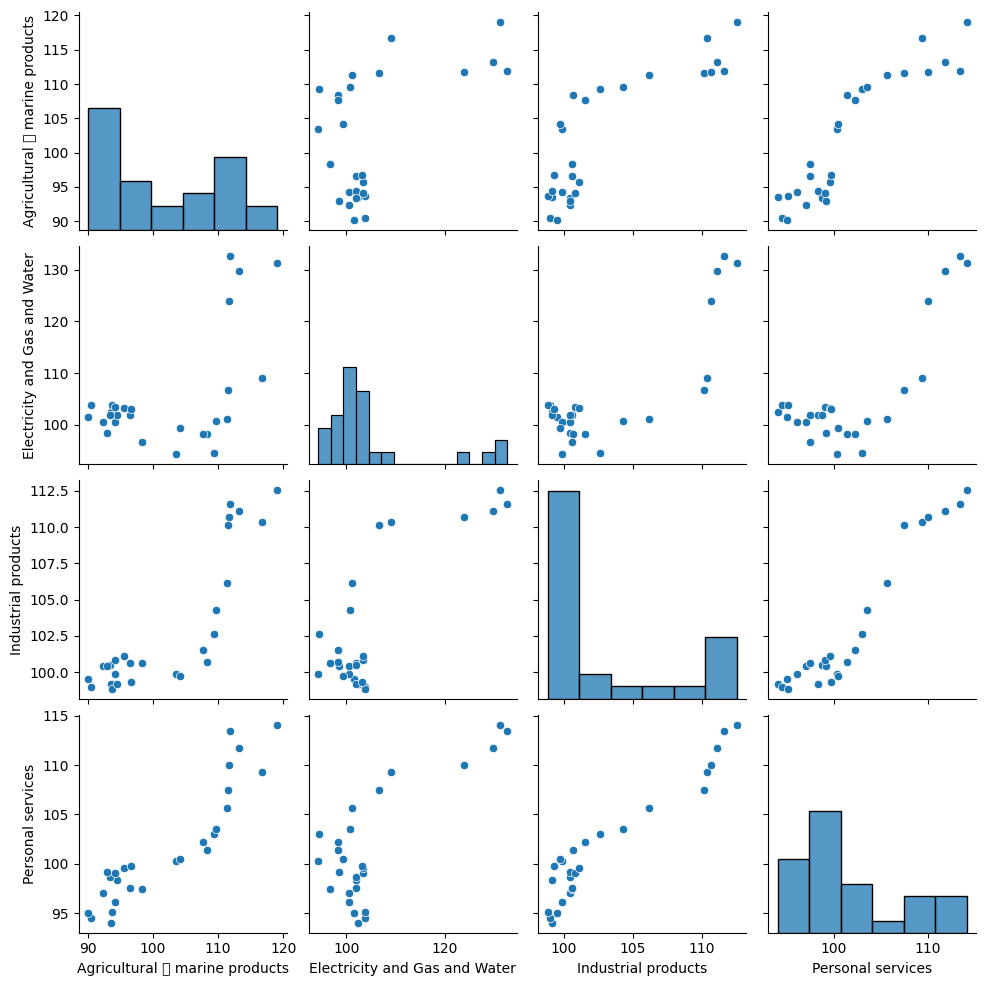

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 독립 변수 열 선택
independent_variable_columns = ['Agricultural ＆ marine products', 'Electricity and Gas and Water', 'Industrial products']

# 종속 변수 열 선택
dependent_variable_column = 'Personal services'  

# 데이터프레임에서 필요한 열만 추출
data = ndf[independent_variable_columns + [dependent_variable_column]]

# seaborn을 사용하여 부분 회귀 플롯 그리기
sns.pairplot(data)
plt.show()


In [48]:
independent_variable_columns = ['Agricultural ＆ marine products', 'Electricity and Gas and Water', 'Industrial products']

# 종속 변수 열 선택
dependent_variable_column = 'Personal services'

# 데이터프레임에서 필요한 열만 추출
data = ndf[independent_variable_columns + [dependent_variable_column]]

# 독립 변수와 종속 변수를 분리
X = data[independent_variable_columns]
y = data[dependent_variable_column]

# 회귀 모델 초기화 및 학습
model = LinearRegression()
model.fit(X, y)

# 각 독립 변수의 계수 확인
coefficients = model.coef_

# 결과 출력
for i in range(len(independent_variable_columns)):
    print(f"{independent_variable_columns[i]}의 계수: {coefficients[i]}")

Agricultural ＆ marine products의 계수: 0.31862974426086343
Electricity and Gas and Water의 계수: 0.11860096775422768
Industrial products의 계수: 0.4575206998178429


In [49]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 독립 변수 열 선택
independent_variable_columns = ['Agricultural ＆ marine products', 'Electricity and Gas and Water', 'Industrial products']

# 데이터프레임에서 필요한 열만 추출
data = ndf[independent_variable_columns]

# 상관 행렬 확인
correlation_matrix = data.corr()
print("상관 행렬:")
print(correlation_matrix)

# VIF 확인
X = sm.add_constant(data)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF:")
print(vif_data)


상관 행렬:
분야                              Agricultural ＆ marine products  \
분야                                                               
Agricultural ＆ marine products                        1.000000   
Electricity and Gas and Water                         0.531622   
Industrial products                                   0.847938   

분야                              Electricity and Gas and Water  \
분야                                                              
Agricultural ＆ marine products                       0.531622   
Electricity and Gas and Water                        1.000000   
Industrial products                                  0.815413   

분야                              Industrial products  
분야                                                   
Agricultural ＆ marine products             0.847938  
Electricity and Gas and Water              0.815413  
Industrial products                        1.000000  

VIF:
                         Variable          VIF
0            

In [50]:
# 'Industrial products' 변수를 제외한 독립 변수 열 선택
independent_variable_columns_updated = ['Agricultural ＆ marine products', 'Electricity and Gas and Water']

# 데이터프레임에서 필요한 열만 추출
data_updated = ndf[independent_variable_columns_updated + ['Personal services']]

# 독립 변수와 종속 변수를 분리
X_updated = sm.add_constant(data_updated[independent_variable_columns_updated])
y_updated = data_updated['Personal services']

# 새로운 모델 초기화 및 학습
model_updated = sm.OLS(y_updated, X_updated).fit()

# 새로운 모델의 요약 정보 출력
print(model_updated.summary())


                            OLS Regression Results                            
Dep. Variable:      Personal services   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     212.6
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           5.40e-16
Time:                        12:48:32   Log-Likelihood:                -46.266
No. Observations:                  27   AIC:                             98.53
Df Residuals:                      24   BIC:                             102.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

회귀 모델 요약:

결정계수(R-squared): 0.947
수정된 결정계수(Adj. R-squared): 0.942
F 통계량: 212.6
F 통계량의 p-value: 5.40e-16 (매우 작음)
계수 (회귀 계수):

'Agricultural ＆ marine products'의 회귀 계수: 0.4549
'Electricity and Gas and Water'의 회귀 계수: 0.2194
통계적 유의성 (P-value):

'Agricultural ＆ marine products'의 P-value: 0.000 (통계적으로 유의함)
'Electricity and Gas and Water'의 P-value: 0.000 (통계적으로 유의함)
해석:

새로운 모델은 전체 데이터의 94.7%를 설명하는 것으로 나타났습니다 (R-squared).
'Agricultural ＆ marine products'와 'Electricity and Gas and Water' 변수들은 종속 변수인 'Personal services'에 통계적으로 유의미한 영향을 미치는 것으로 나타났습니다.
주의 사항:

모델의 조건 수(condition number)가 크게 나타났습니다. 이는 강한 다중 공선성 또는 다른 수치적 문제가 있을 수 있다는 신호일 수 있습니다.
추가 조치:

다중 공선성이 여전히 문제가 될 수 있으므로, 조금 더 변수를 조정하거나 추가적인 다중 공선성 진단을 수행하는 것이 좋습니다.
변수 선택이나 변수 변환 기법을 사용하여 모델을 개선하고, 필요한 경우에는 다른 변수를 추가하거나 제거하여 모델을 더욱 믿을 수 있게 만들어 볼 수 있습니다.

In [52]:

# 독립 변수 열 선택
independent_variable_columns = ['Agricultural ＆ marine products', 'Electricity and Gas and Water']

# 데이터프레임에서 필요한 열만 추출
data = ndf[independent_variable_columns]

# 상수 열 추가
X = sm.add_constant(data)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 결과 출력
print("VIF:")
print(vif_data)


VIF:
                         Variable         VIF
0                           const  152.317590
1  Agricultural ＆ marine products    1.393964
2   Electricity and Gas and Water    1.393964


VIF 결과:

'Agricultural ＆ marine products'의 VIF: 1.39
'Electricity and Gas and Water'의 VIF: 1.39
상수 (const)의 VIF: 152.32
해석:

'Agricultural ＆ marine products'와 'Electricity and Gas and Water' 변수들의 VIF가 모두 1.39로, 일반적으로는 다중 공선성이 문제가 없을 정도로 낮게 나타났습니다.
상수 항(const)의 VIF는 152.32로 높게 나타났으나, 상수 항의 다중 공선성은 큰 문제가 되지 않습니다.
결론:

현재의 결과에서는 선택한 독립 변수들 간에 다중 공선성이 크게 나타나지 않습니다.


In [54]:
x_new = ndf[['Agricultural ＆ marine products','Electricity and Gas and Water']]
y_new =ndf['Personal services']

In [55]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new,y_new,test_size=0.3,random_state=10)

In [56]:
print('traindata: ',x_new_train.shape)
print('testdata : ',x_new_test.shape)

traindata:  (18, 2)
testdata :  (9, 2)


In [57]:
new_lr = LinearRegression()
new_lr.fit(x_new_train, y_new_train)

LinearRegression()

In [58]:
r_new_square = new_lr.score(x_new_test,y_new_test)
print(r_new_square)

0.9325743137617126


In [59]:
print('x_new 변수의 계수 a :', new_lr.coef_)
print('상수항 b', new_lr.intercept_)

x_new 변수의 계수 a : [0.42189908 0.23915931]
상수항 b 33.44595710466197


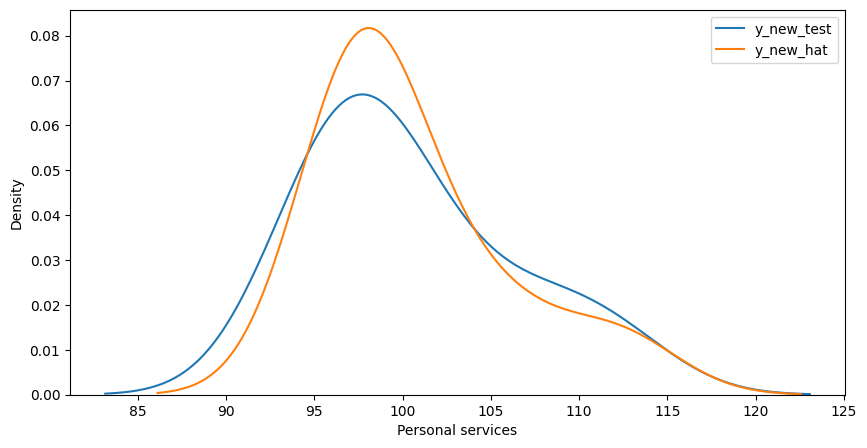

In [60]:
y_new_hat = new_lr.predict(x_new_test)
plt.figure(figsize=(10,5))
ax1=sns.kdeplot(y_new_test,label="y_new_test")
ax2= sns.kdeplot(y_new_hat, label="y_new_hat",ax=ax1)
plt.legend()
plt.show() #전체적인 회귀